# 01. Importing libraries

In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 02. Importing data

In [85]:
path = r'/Users/marcela/Desktop/CF/Data Immersion/Achievement 6/Brazilian Ecommerce Analysis'

In [86]:
df_items = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'items_checked.csv'), index_col = False)

In [87]:
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked.csv'), index_col = False)

In [88]:
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_checked.csv'), index_col = False)

In [89]:
df_payments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'payments_checked.csv'), index_col = False)

In [90]:
df_name_translation = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'product_category_name_translation.csv'), index_col = False)

# 03. Merging DataFrames

In [91]:
merged_df = (
    df_ords
    .merge(df_items, on='order_id', how='inner')
    .merge(df_payments, on='order_id', how='inner')
    .merge(df_prods, on='product_id', how='inner')
    .merge(df_name_translation, on='product_category_name', how='inner')
)

In [92]:
merged_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2017-08-28 00:00:00              1   
4           2017-08-15 00:00:00              1   

                         product_id  ... payment_value  product_category_name  \
0  87285b34884572647811a353c7ac498a  ...         18.12  utilidades_domesticas   
1  87285b34884572647811a353c7ac498a  ...          2.00  utilidades_domesticas   
2  87285b34884572647811a353c7ac498a  ...         18.59  utilidades_domesticas   
3  87285b34884572647811a353c7ac498a  ...         37.77  utilidades_domesticas   
4  87285b34884572647811a353c7ac498a  ...         37.77  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

  product_weight_g  product_length_cm  product_height_cm product_width_cm  \
0            500.0               19.0                8.0             13.0   
1            500.0               19.0                8.0             13.0   
2            500.0               19.0                8.0             13.0   
3            500.0               19.0                8.0             13.0   
4            500.0               19.0                8.0             13.0   

   product_category_name_english  
0                     housewares  
1                     housewares  
2                     housewares  
3                     housewares  
4                     housewares  

[5 rows x 27 columns]

# 04. Creating a correlation matrix heatmap

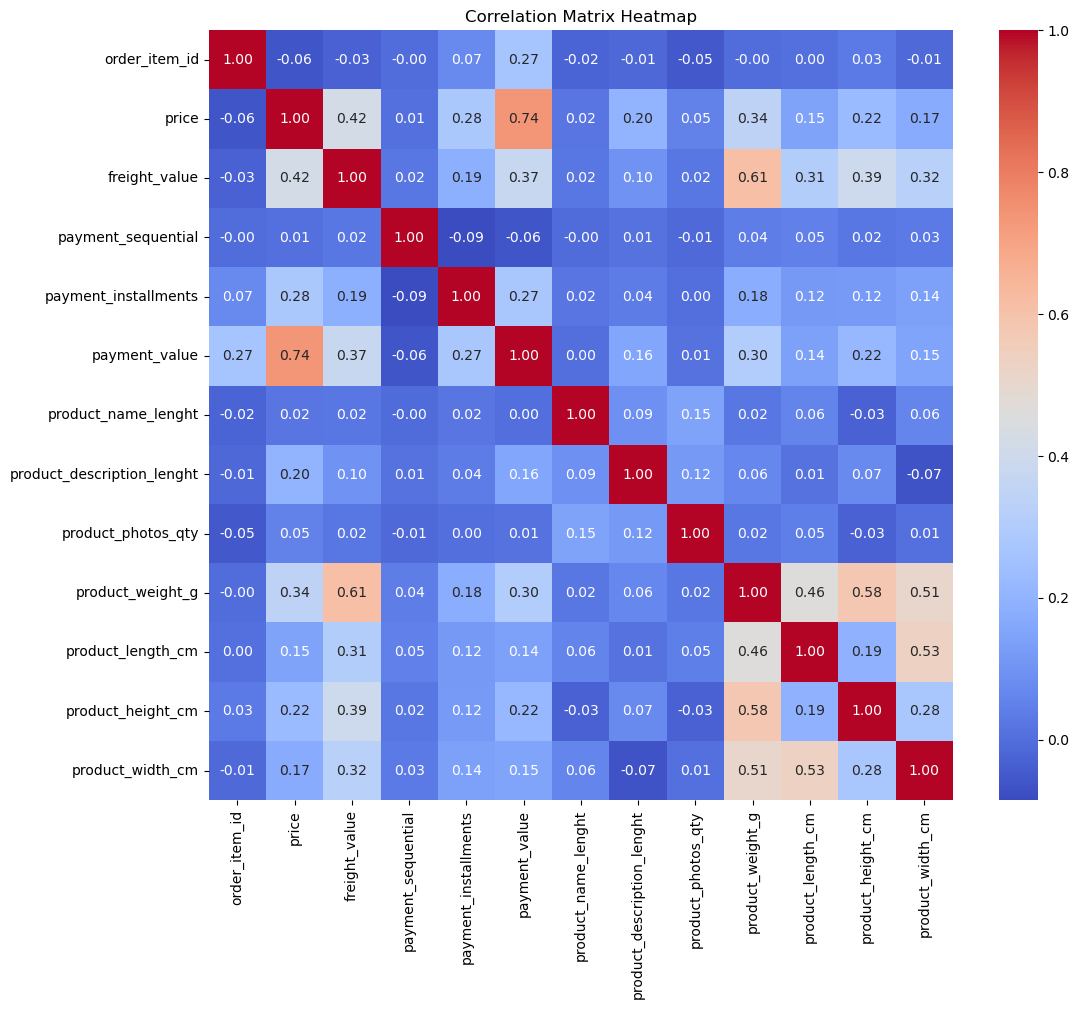

In [93]:
# Selecting the relevant numerical columns for correlation matrix
numeric_columns = merged_df.select_dtypes(include=['number']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## The coefficients in the heatmap show the strength of the linear relationships between variables in my dataset:

### Values near +1: Indicate variables that increase together, like price and payment_value.
### Values near -1: There aren't any in this heatmap, but they would show an inverse relationship.
### Values near 0: Suggest no strong linear relationship, such as between order_item_id and freight_value.

### I see that price is moderately correlated with freight_value, hinting that higher prices might come with higher shipping costs. Also, the physical dimensions of products have positive correlations with each other. These correlations suggest patterns that could inform further analysis, although they don't establish cause and effect.

# 05. Creating a Scatterplot

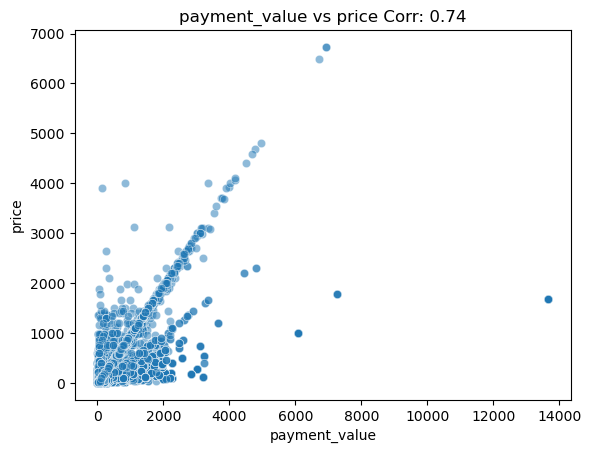

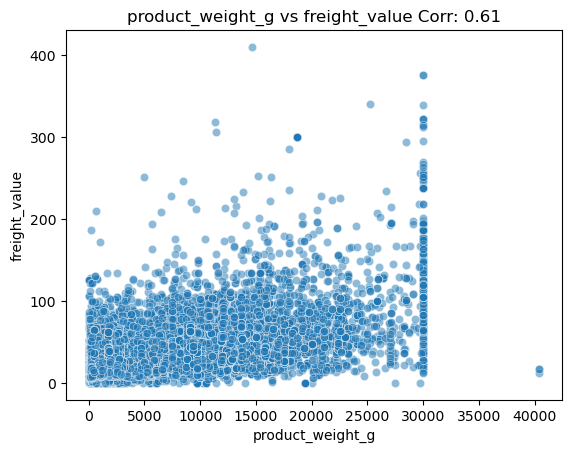

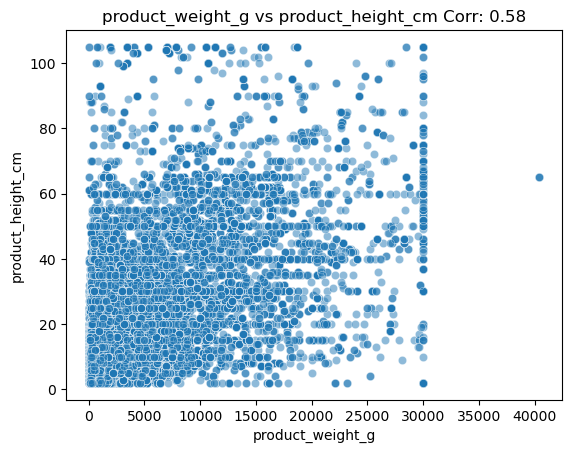

In [94]:
# Selecting the main correlated variable pairs
top_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_pairs = top_corr_pairs[top_corr_pairs < 1].head(3)

# Plotting scatterplots for these variable pairs
for (var1, var2) in top_corr_pairs.index:
    sns.scatterplot(x=merged_df[var1], y=merged_df[var2], alpha=0.5)
    plt.title(f"{var1} vs {var2} Corr: {top_corr_pairs[(var1, var2)]:.2f}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

## The scatterplots show:

### Payment Value vs. Price: A positive linear relationship, indicating higher prices generally lead to higher payments.

### Product Weight vs. Freight Value: A positive correlation, suggesting heavier products usually have higher freight costs, but with variability that may be influenced by other factors.

### Product Weight vs. Product Height: A moderate positive correlation, but the wide spread of points implies that product weight and height are related to a degree, yet the relationship is not strictly linear and other dimensions or factors may also be at play.

# 06. Creating a Pair Plot

In [95]:
# Ignore future warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

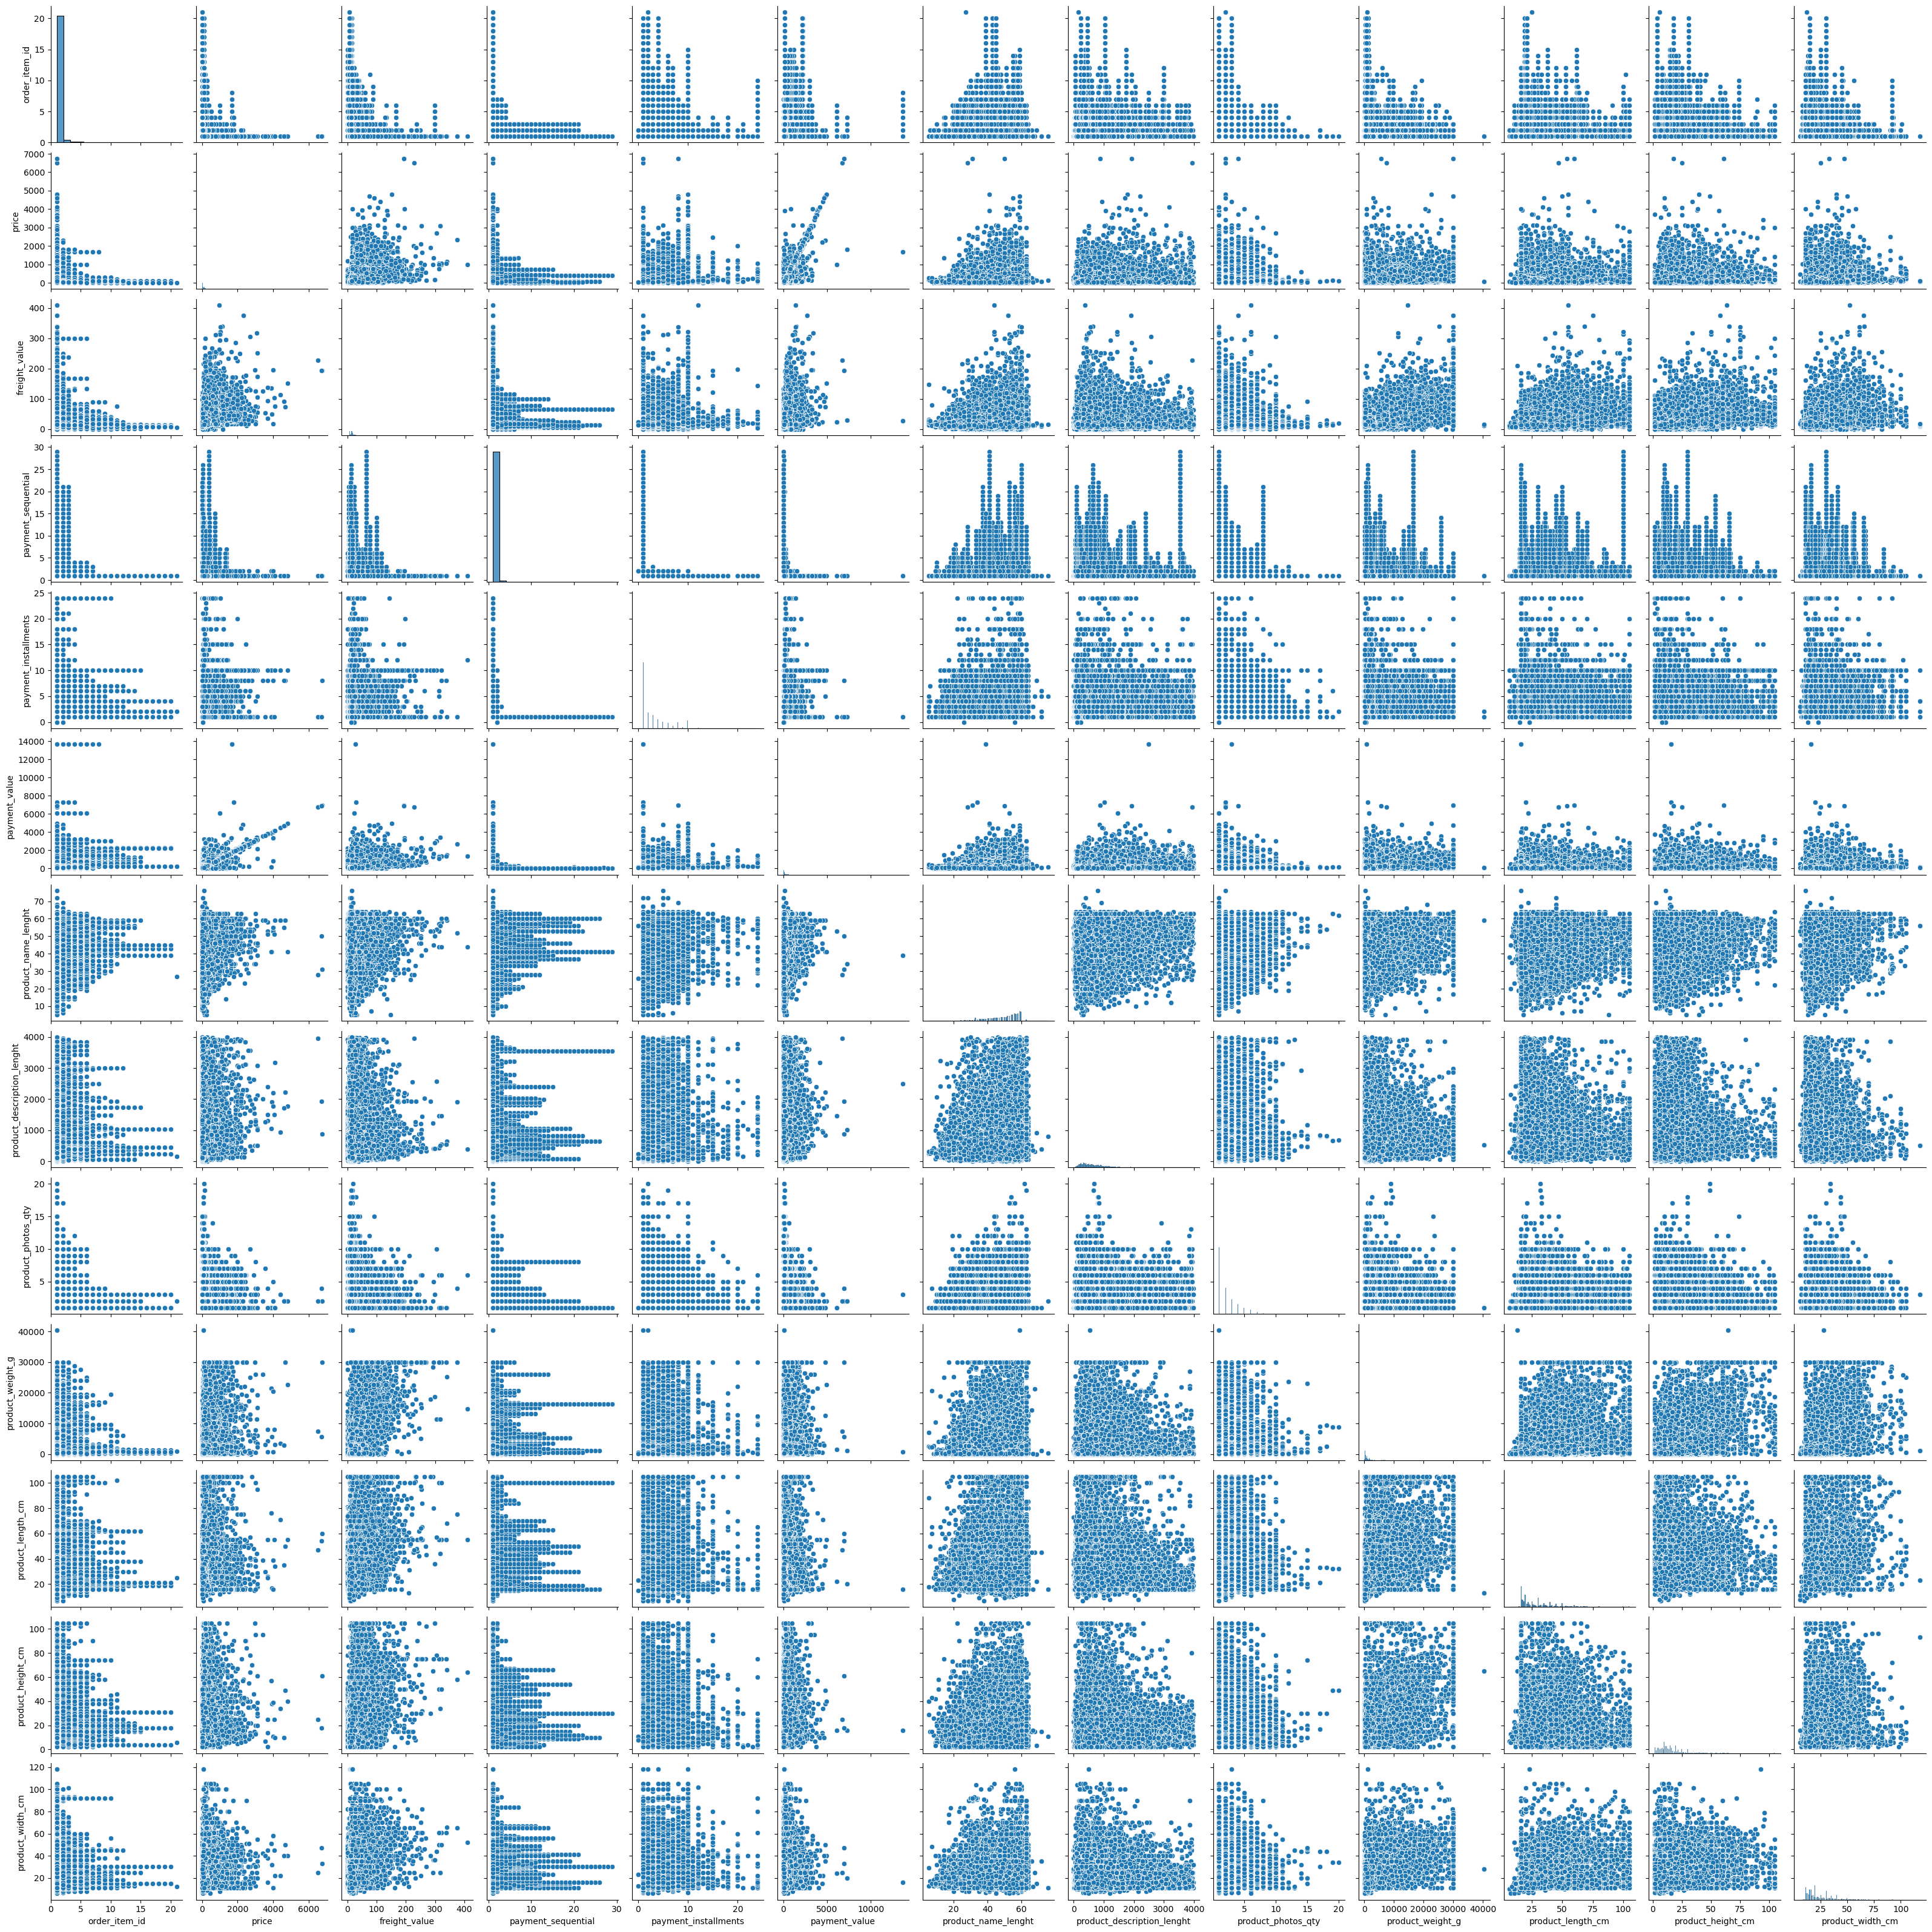

In [96]:
# Creating a pair plot for the entire DataFrame
sns.pairplot(merged_df)

# Showing the plot
plt.show()

## The pair plot indicates:

### Skewed distributions for several variables, suggesting the need for normalization.
### Some variables display potential linear relationships, which could be significant for predictive modeling.
### Clusters in certain plots may hint at subgroups or categorical relationships.
Variables of interest for further exploration include those with skewed distributions for potential transformation and those with strong linear patterns for their relevance in modeling. Outliers and clusters also warrant a closer look to understand their impact on the data and identify any underlying subgroups.

# 07. Creating a Categorical Plot 

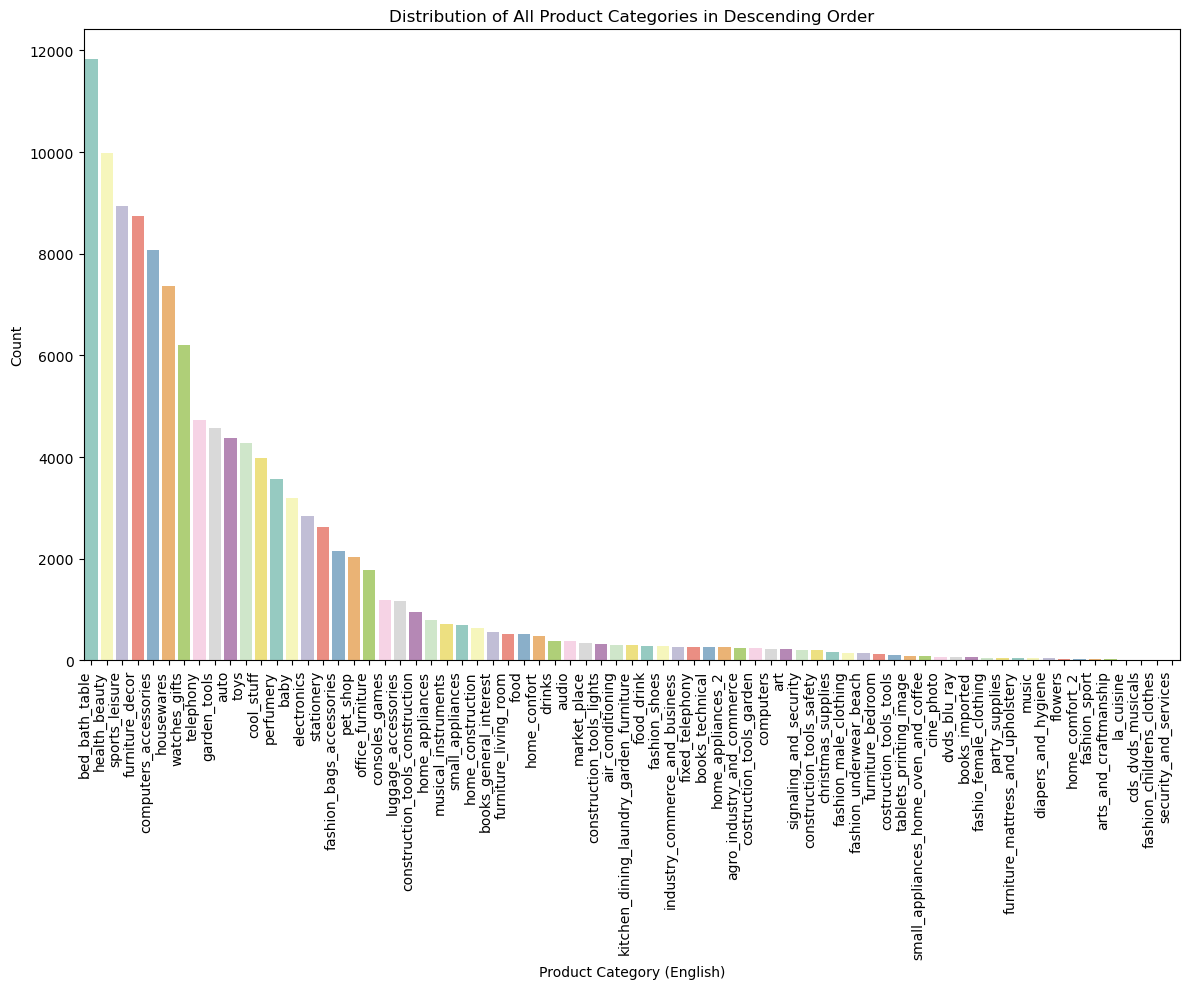

In [97]:
# Calculating the order of categories based on their counts in descending order
category_order = merged_df['product_category_name_english'].value_counts().index

# Creating a countplot for all product categories with specified order and adjusted figure size
plt.figure(figsize=(12, 10))
sns.countplot(
    x='product_category_name_english',
    data=merged_df,
    palette='Set3',
    order=category_order
)

# Rotating and setting the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Setting the title and labels
plt.title('Distribution of All Product Categories in Descending Order')
plt.xlabel('Product Category (English)')
plt.ylabel('Count')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

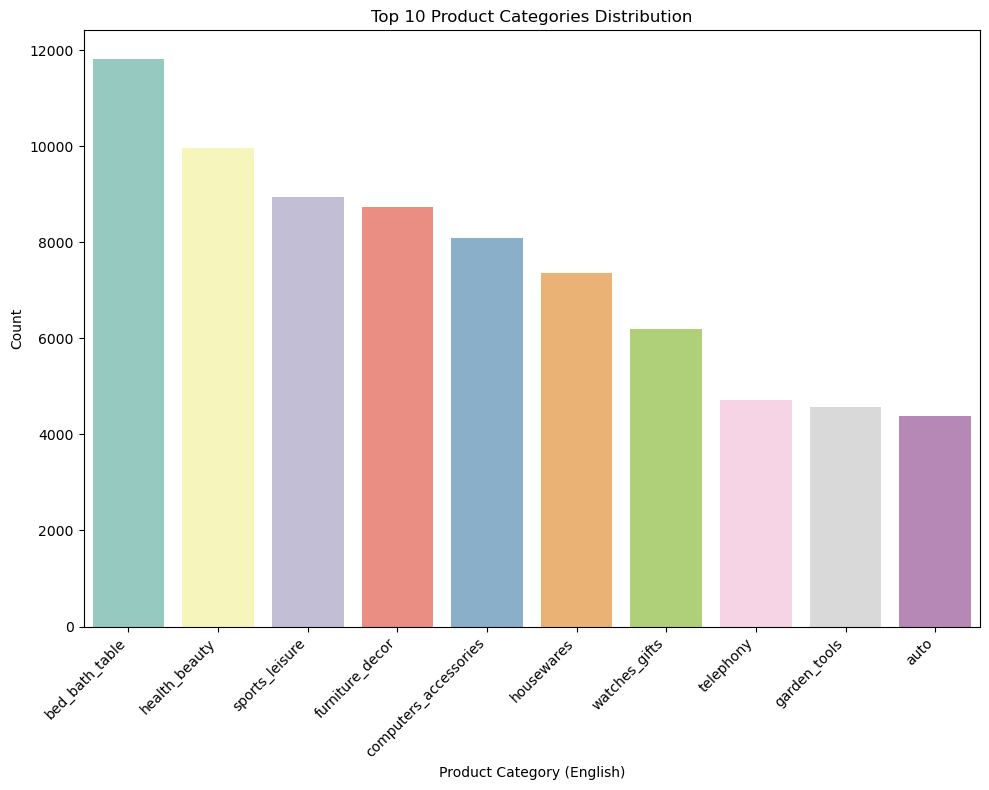

In [98]:
# Setting the number of categories to display
top_n_categories = 10

# Obtaining the top N categories based on count
category_order = merged_df['product_category_name_english'].value_counts().head(top_n_categories).index

# Creating a countplot for the top N product categories with adjusted figure size
plt.figure(figsize=(10, 8))
sns.countplot(
    x='product_category_name_english',
    data=merged_df[merged_df['product_category_name_english'].isin(category_order)],
    palette='Set3',
    order=category_order
)

# Rotating and setting the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Setting the title and labels
plt.title('Top 10 Product Categories Distribution')
plt.xlabel('Product Category (English)')
plt.ylabel('Count')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

### The first plot shows a skewed distribution with a few product categories dominating the dataset. 
### The second plot highlights the top 10 categories, with "bed_bath_table", "health_beauty", and "sports_leisure" being the most prevalent. These dominant categories could indicate areas of high customer interest or market strength, while less common categories may suggest niche markets or underrepresented areas in the inventory.

# 08. Questions from Previous Task

## Based on the visual exploration:

### Price and Freight Correlation: There is a positive correlation, which could impact how shipping costs are set.
### Category Trends: Some product categories are more common, but pricing and shipping trends need further analysis.
### Popular Products and Regional Variations: Identified most popular categories; regional variations unexplored.

## New question based on findings: 
### What factors influence the dominant product categories in terms of sales volume and shipping costs?

# 09. Hypotheses

## Seasonal Sales Hypothesis: 
### Sales volumes peak during certain times of the year, indicating a seasonal pattern to e-commerce activity. 

## Regional Demand Hypothesis: 
### The demand for certain product categories varies significantly by region. 